# Scaling 

Scaling in machine learning refers to the process of transforming the input features of a dataset so that they have similar numerical ranges or scales. This is important because many machine learning algorithms are sensitive to the scaling of input features. When features are at different scales, some features can dominate other features in determining the output of the algorithm, resulting in inaccurate or skewed results.

Common scaling techniques include standardization, in which features are transformed to have zero mean and unit variance, and normalization, in which features are transformed to have a range of values ​​between 0 and 1. Other techniques include logarithmic scaling and min-max scaling. Scaling is an important step in machine learning preprocessing and can improve the accuracy and performance of many machine learning algorithms. Scaling the input features allows the algorithm to treat each feature equally, avoiding dominance or bias that might otherwise occur. 

Here we will try to make our own scaling techniques

****

Lets take this [dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset) for example and visualization

In [107]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [108]:
data = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

In [109]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


`avg_glucose_level` is a good one to test the techniques, so we will focus on that one

The mean of the data is :  106.1476771037182
The standard deviation of the data is : 45.27912905705891




<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

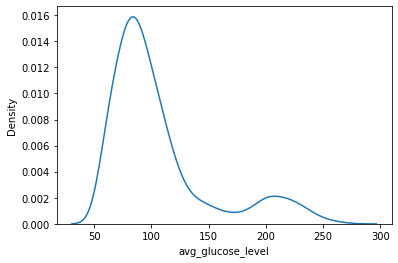

In [17]:
sample_data = data["avg_glucose_level"]

print("The mean of the data is : " , np.mean(sample_data))
print("The standard deviation of the data is :" , np.std(sample_data))
print("\n")

sns.kdeplot(sample_data)

For a scaled array, the `mean` is $0$ and `standard deviation` is $1$, but here is not the case, so we will try to correct these things

Scaling is a technique we can perfrom to fit this. There are majorly two types of scaling techniques in machine learning which are 
* Min Max Scaling / Range Scaling 
* Z Score Scaling / Standard Score Scaling

We will try to create our own scalers from scractch using the modules 
* Numpy

****
Our first one will be **Min Max Scaling**
****
## Min Max Scaling 
Min-max scaling is a common data preprocessing technique used in machine learning to scale numerical features of a dataset to the range 0 to 1.

To perform min-max scaling, the minimum and maximum values ​​of the features are first determined. Then, for each value of the feature, the difference between value and minimum is divided by the range (that is, the difference between maximum and minimum). This scales the minimum value to 0, the maximum value to 1, and proportionally scales all other values ​​in between.

Min-max scaling is useful when the range of values ​​for different features is large and can have a large impact on the learning algorithm. Scaling all features to the same range prevents features with large values ​​from dominating the learning process and ensures that all features are equally important.

Note that min-max scaling does not change the distribution of the data. So if the original data is skewed or has outliers, those features will still be there after scaling. If the new data contains values ​​outside the original range, scaling may not work as expected. 

The basic formula behind min-max scaling is
**** 

$$x_{sclaed} = \frac {x_{i} - x_{min}}{x_{max} - x_{min}}$$
****
We will first try to scale one value from the dataset and then fit the whole data like that. So lets take our first value as $228.69$

In [110]:
print("The minimum value of the array is : ", sample_data.min())
print("The maximum value of the array is : " , sample_data.max())
print("The mean value of the array is : " , sample_data.mean())

The minimum value of the array is :  55.12
The maximum value of the array is :  271.74
The mean value of the array is :  106.1476771037182


In [114]:
(228.69 - 106.14)/ (271.74 - 55.12)

0.5657372357123073

So now we have applied the technique on one element we will try to implemenet it all over the array 

In [112]:
scaled = np.array([])

for x in sample_data:

    scale = (x - sample_data.mean()) / (sample_data.max() - sample_data.min())
    scaled = np.hstack([scaled , scale])

In [113]:
scaled

array([ 0.5657018 ,  0.44346008, -0.00105104, ..., -0.10690461,
        0.27763975, -0.0963331 ])

Now lets try to implemets it on a multi dimensional array 

In [ ]:
scaled = np.array([])

for i in range(len(array.shape)) : 

    single_scaled = np.array([])
    
    if len(array.shape) == 1:
            
        for j in array:
            
            scale = (j - array.mean())/ (array.max() - array.min())

            single_scaled = np.hstack([single_scaled , scale])
        
        scaled = single_scaled
    
    else:

        for j in array[i]:

            scale = (j - array[i].mean())/ (array[i].max() - array[i].min())

            single_scaled = np.hstack([single_scaled , scale])

        scaled = np.vstack(scaled . single_scaled)

We have a our scaler created but there are some edge cases that we should handle before deplying it. Such as 
* What if user enters a categorical column

For rectfying the first one as 
**What if user enters a categorical column**

For this we will just add a if condition in betweeen 

In [ ]:
scaled = np.array([])

for i in range(len(array.shape)) : 

    single_scaled = np.array([])
    
    if len(array.shape) == 1:
            
        if not (array.dtype == int or array.dtype == float) :

            print(i , "th index was a categorical column, Please pass only numerical columns. ")
            
        else:    
            
            for j in array:
            
                scale = (j - array[i].mean())/ (array[i].max() - array.min())

                single_scaled = np.hstack([single_scaled , scale])
                scaled = single_scaled
    
    else:

        for j in array[i]:

            if not (array[i].dtype == int or array[i].dtype == float) :

                print(i , "th index was a categorical column, Please pass only numerical columns. ")
                scaled = np.zeros(len(array[i]))

            else:

                scale = (j - array[i].mean())/ (array[i].max() - array[i].min())

                single_scaled = np.hstack([single_scaled , scale])

        scaled = np.vstack(scaled . single_scaled)

Now as our scaler is created covering some of the edge cases, we can put it in a function, for more convinenient usage 

In [115]:
def min_max_scaler(array):
    
    scaled = np.array([])

    for i in range(len(array.shape)) : 
    
        single_scaled = np.array([])
        
        if len(array.shape) == 1:
                
            if not (array.dtype == int or array.dtype == float) :

                print(i , "th index was a categorical column, Please pass only numerical columns. ")
                
            else:    
                
                for j in array:
                
                    scale = (j - array[i].mean())/ (array[i].max() - array.min())

                    single_scaled = np.hstack([single_scaled , scale])
                    scaled = single_scaled
        
        else:
    
            for j in array[i]:

                if not (array[i].dtype == int or array[i].dtype == float) :

                    print(i , "th index was a categorical column, Please pass only numerical columns. ")
                    scaled = np.zeros(len(array[i]))

                else:

                    scale = (j - array[i].mean())/ (array[i].max() - array[i].min())

                    single_scaled = np.hstack([single_scaled , scale])

            scaled = np.vstack(scaled . single_scaled)

    return scaled

Now lets try it on our sample data and see the outputs

In [116]:
print("The mean of the scaled array is : " , min_max_scaler(sample_data).mean())
print("The standard deviation of the scaled array is : " , min_max_scaler(sample_data).std())

The mean of the scaled array is :  -0.7060109632786876
The standard deviation of the scaled array is :  0.2608695572798232


The results are not as good as expected but we are enough for us, lets compare the plot of the previous one and before the scaling arrays 

<AxesSubplot:ylabel='Density'>

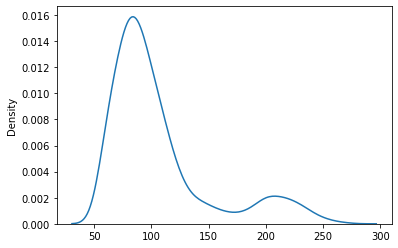

In [117]:
sns.kdeplot(sample_data)

<AxesSubplot:ylabel='Density'>

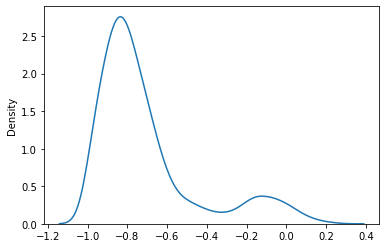

In [99]:
sns.kdeplot(min_max_scaler(sample_data))

Notice how the structured is preserved but the dimensions have been changed, thsi is one of the advantages of `min max scaler`, though it is not effective at changing the mean and standard deviation , but it is good at perseving the actual content of the data 

****
Now lets try to implemet **Z Score Nomralization / Standard Score Normalization**
****

### Z Score Normaliation / Standard Score Normalization 

In machine learning, a z-score scaler is a normalization technique used to standardize characteristics of a data set. The z-score scaler scales each feature to have a mean of 0 and a standard deviation of 1. This is accomplished by subtracting the feature mean from each data point and dividing by the feature standard deviation.

where mean is the mean of the features and standard deviation is the standard deviation of the features. The resulting Z-score represents the number of standard deviations from the mean of the data points. A positive z-score indicates that the data point is above the average, and a negative z-score indicates that the data point is below the average.

Using a z-score scaler is useful when working with features at different scales or units. Feature standardization allows the model to give equal weight to each feature, preventing features with larger values ​​from dominating the model's predictions. Z-score scalers are commonly used in many machine learning algorithms. B. k Nearest Neighbors, Logistic Regression, and Support Vector Machines. 
****
$$x_{scaled} = \frac {x_{i} - x_{mean}}{\sigma}$$
$$\sigma = \frac {\sum (x_{i} - x_{mean})}{Number_-of_-values}$$
****

We will first try to scale one value from the dataset and then fit the whole data like that. So lets take our first value as $228.69$

In [118]:
print("The minimu value of the array is : " , sample_data.min())
print("The mean value of the array is : ", sample_data.mean())
print("The standard deviation of the array is : " , sample_data.std())

The minimu value of the array is :  55.12
The mean value of the array is :  106.1476771037182
The standard deviation of the array is :  45.27912905705891


In [119]:
(228 - 106.14)/ (45.27)

2.691848906560636

So now we have applied the technique on one element we will try to implemenet it all over the array

In [120]:
scaled = np.array([])

for x in sample_data:

    scale = (x - sample_data.mean()) / sample_data.std()
    scaled = np.hstack([scaled , scale])

Now lets try to implemets it on a multi dimensional array

In [ ]:
scaled = np.array([])

for i in range(len(array.shape)) : 

    single_scaled = np.array([])
    
    if len(array.shape) == 1:
            
        for j in array:
            
            scale = (j - array.mean())/ array.std

            single_scaled = np.hstack([single_scaled , scale])
        
        scaled = single_scaled
    
    else:

        for j in array[i]:

            scale = (j - array[i].mean())/ (array[i].max() - array[i].min())

            single_scaled = np.hstack([single_scaled , scale])

        scaled = np.vstack(scaled . single_scaled)

We have a our scaler created but there are some edge cases that we should handle before deplying it. Such as 
* What if user enters a categorical column

For rectfying the first one as 
**What if user enters a categorical column**

For this we will just add a if condition in betweeen 

In [122]:
def standard_scaler(array):
    
    scaled = np.array([])

    for i in range(len(array.shape)) : 
    
        single_scaled = np.array([])
        
        if len(array.shape) == 1:
                
            if not (array.dtype == int or array.dtype == float) :

                print(i , "th index was a categorical column, Please pass only numerical columns. ")
                
            else:    
                
                for j in array:
                
                    scale = (j - array.mean())/ array.std()

                    single_scaled = np.hstack([single_scaled , scale])
                    
                scaled = single_scaled
        
        else:
    
            for j in array[i]:

                if not (array[i].dtype == int or array[i].dtype == float) :

                    print(i , "th index was a categorical column, Please pass only numerical columns. ")
                    scaled = np.zeros(len(array[i]))

                else:

                    scale = (j - array[i].mean())/ array[i].std()

                    single_scaled = np.hstack([single_scaled , scale])

            scaled = np.vstack(scaled . single_scaled)

    return scaled

Now lets try it on our sample data and see the outputs

In [123]:
print("The mean of the scaled array is : " , standard_scaler(sample_data).mean())
print("The standard deviation of the scaled array is : " , standard_scaler(sample_data).std())

The mean of the scaled array is :  1.0011561051805717e-16
The standard deviation of the scaled array is :  1.0


As we can see the rsults are great compared to the min max scaler, lets try plotting some graphs

<AxesSubplot:ylabel='Density'>

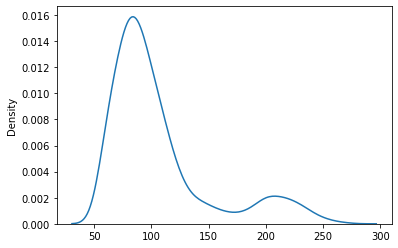

In [124]:
sns.kdeplot(sample_data)

<AxesSubplot:ylabel='Density'>

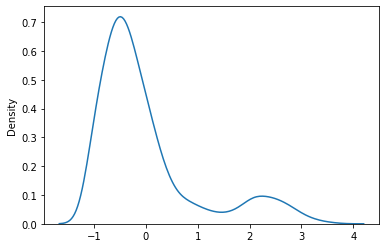

In [125]:
sns.kdeplot(standard_scaler(sample_data))

Standard Scaler was able to make the perfect adjustments as well as the preseve the semantic meaning of the array

****
**THATS IT FOR TODAY GUYS**

**DONT FORGET TO DO A YAYYYYYYY IF YOU LIKED/ UNDERSTODD THE THING**

**PEACE OUT !!!**